<a href="https://www.kaggle.com/code/anaghars111/irisflowerclassification?scriptVersionId=239599255" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
df=pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

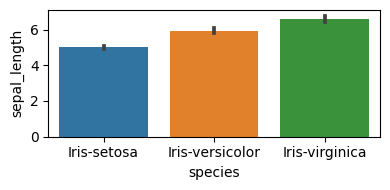

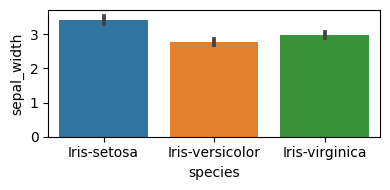

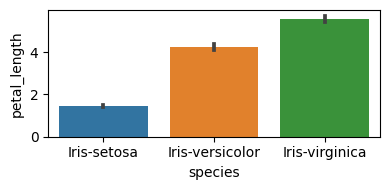

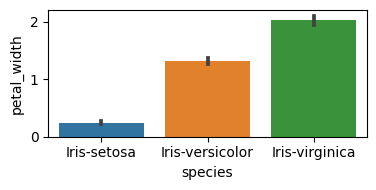

In [8]:
#barplot
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in cols:
    
    plt.figure(figsize=(4,2))
    sns.barplot(x='species',y=col,data=df)
    plt.tight_layout()
    plt.show()

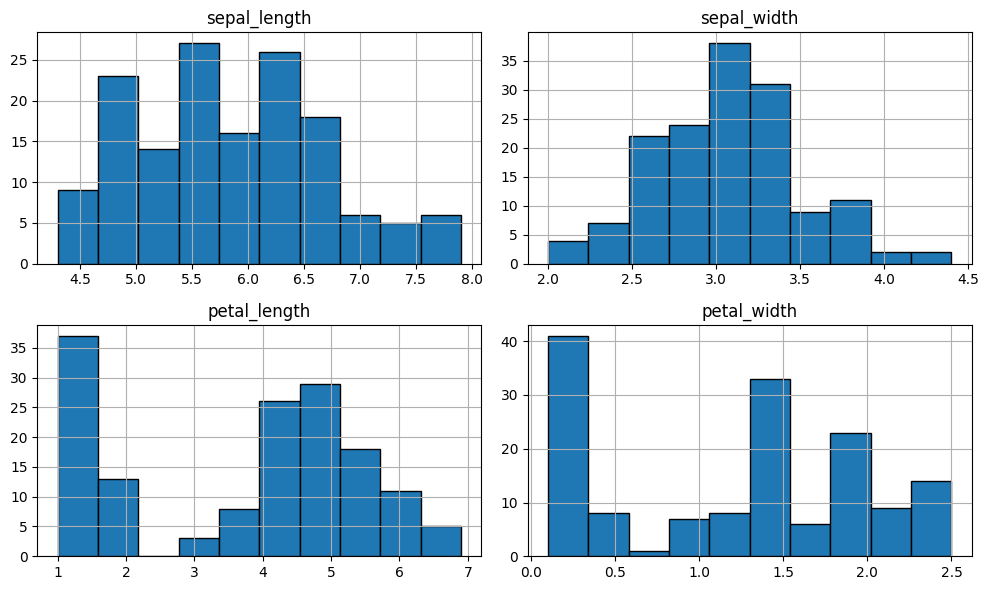

In [9]:
#histogram

df.hist(figsize=(10,6),edgecolor='black')
plt.tight_layout()
plt.show()

In [10]:
#petal length and width have strong seperartions in data 
#sepal length shows variation - can be used for classification
#sepal width shows overlaping peak at middle portion - maybe not a gud indicator alone

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

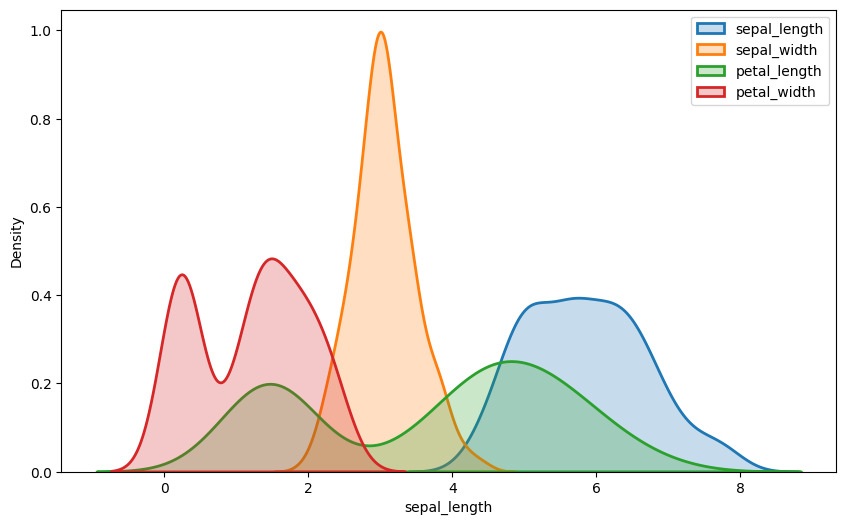

In [11]:
plt.figure(figsize=(10,6))
for col in cols:
    sns.kdeplot(df[col],label=col,fill=True,linewidth=2)

plt.legend()
plt.show()

Petal based fetaures shows two peaks - may be for diff species
sepal features shows single peaks 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

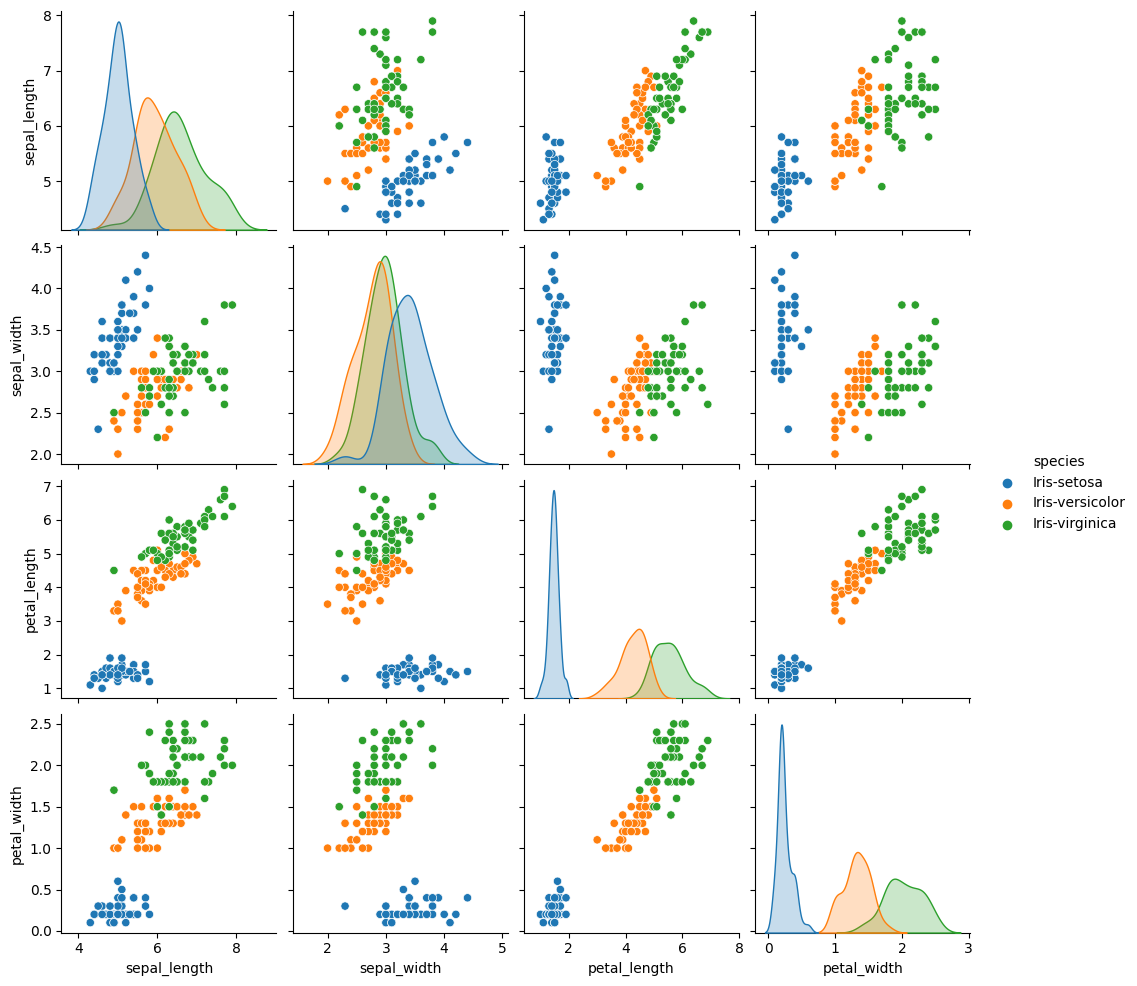

In [12]:
sns.pairplot(df,hue='species',height=2.5)
plt.show()

In [13]:
df['species'] = df['species'].astype('category').cat.codes

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [16]:
df.shape

(150, 5)

In [17]:
#df['sepal_area'] = df['sepal_length']*df['sepal_width']

In [18]:
#df['petal_area'] = df['sepal_length']*df['sepal_width']

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

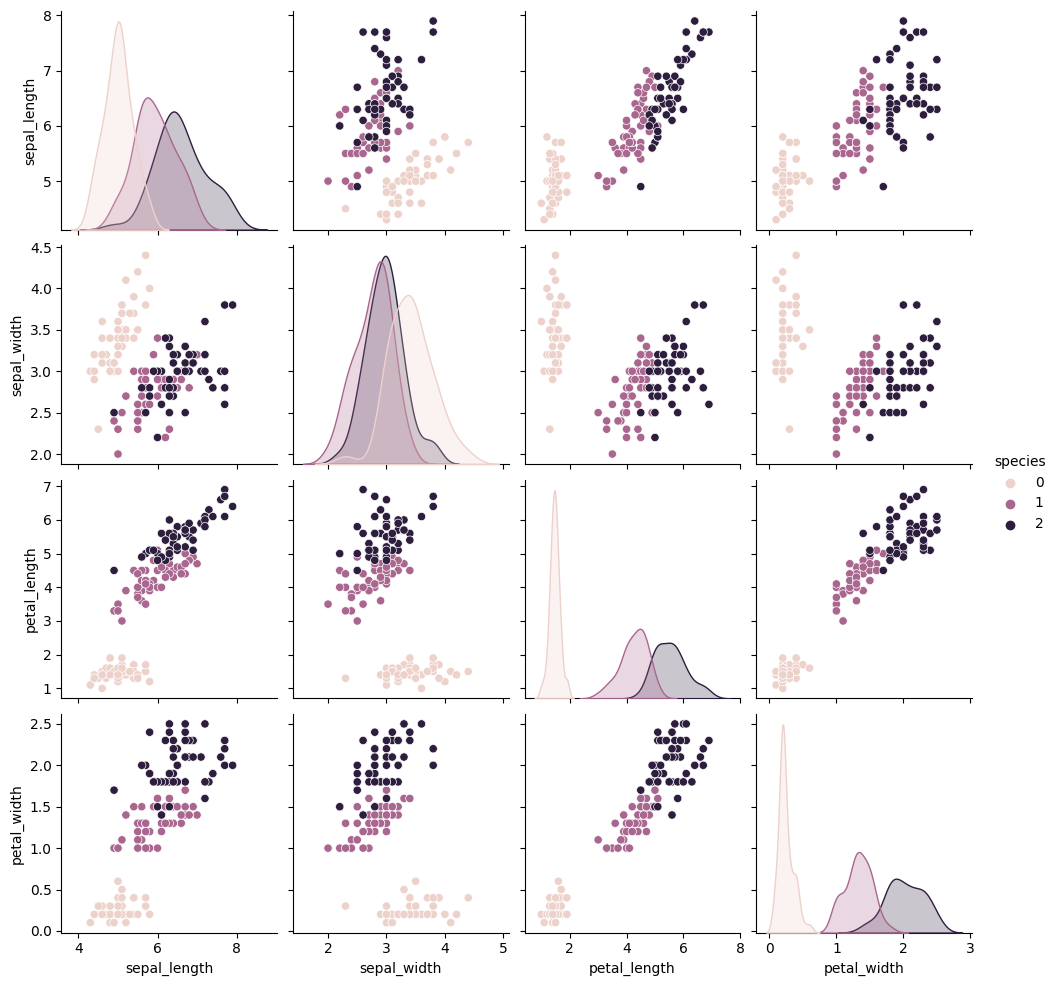

In [20]:
sns.pairplot(df,hue='species',height=2.5)
plt.show()

In [21]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
x = df.drop('species',axis=1)

In [24]:
y=df['species']

In [25]:
x_Scaled=scaler.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{name} Accuracy: {acc:.2f}")


KNN Accuracy: 1.00
SVM Accuracy: 1.00
RandomForest Accuracy: 1.00


KNN Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean Cross-Validation Accuracy: 0.96
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

ROC AUC Score: 0.9963333333333333


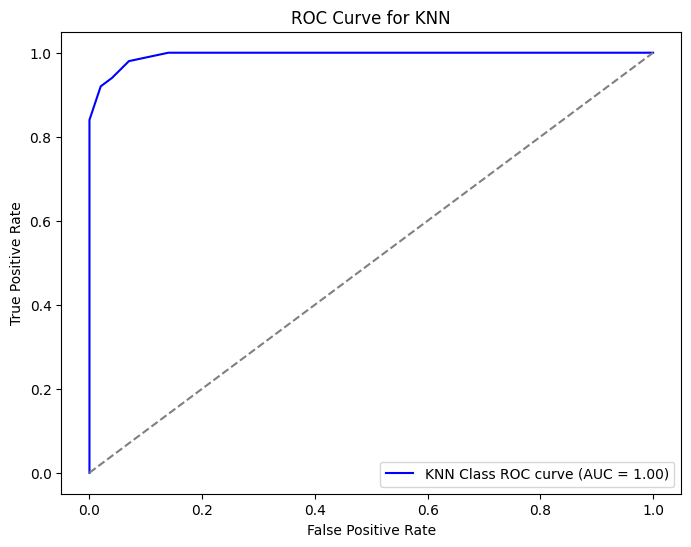

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

from sklearn.metrics import roc_curve
knn = KNeighborsClassifier()

# Cross-validation (5-fold)
cv_scores = cross_val_score(knn, x_Scaled, y, cv=5)  # cv=5 for 5-fold cross-validation
print(f'KNN Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

# Predictions using cross-validation
y_pred = cross_val_predict(knn, x_Scaled, y, cv=5)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(cm)

print('Classification Report:')
print(classification_report(y, y_pred))


roc_auc = roc_auc_score(y, knn.fit(x_Scaled, y).predict_proba(x_Scaled), multi_class='ovr')
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve for each class
fpr, tpr, thresholds = roc_curve(y, knn.fit(x_Scaled, y).predict_proba(x_Scaled)[:, 1], pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'KNN Class ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

SVM Cross-Validation Scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean Cross-Validation Accuracy: 0.9666666666666666
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

ROC AUC Score: 0.9988000000000001


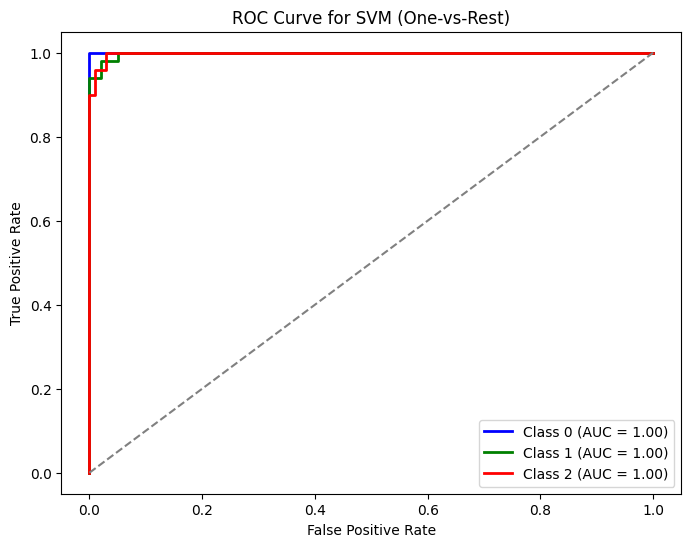

In [30]:
# Initialize the SVM model
svm = SVC(probability=True)  # Ensure probability estimates are available for ROC AUC

# Cross-validation (5-fold)
cv_scores = cross_val_score(svm, x_Scaled, y, cv=5)  # cv=5 for 5-fold cross-validation
print(f'SVM Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

# Predictions using cross-validation
y_pred = cross_val_predict(svm, x_Scaled, y, cv=5)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
print('Classification Report:')
print(classification_report(y, y_pred))

# AUC Calculation (One-vs-Rest for multi-class classification)
roc_auc = roc_auc_score(y, svm.fit(x_Scaled, y).predict_proba(x_Scaled), multi_class='ovr')
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve for each class (One-vs-Rest approach)
fpr = {}
tpr = {}
roc_auc = {}

n_classes = len(set(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y == i, svm.fit(x_Scaled, y).predict_proba(x_Scaled)[:, i])
    roc_auc[i] = roc_auc_score(y == i, svm.predict_proba(x_Scaled)[:, i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

Random Forest Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean Cross-Validation Accuracy: 0.96
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

ROC AUC Score: 1.0


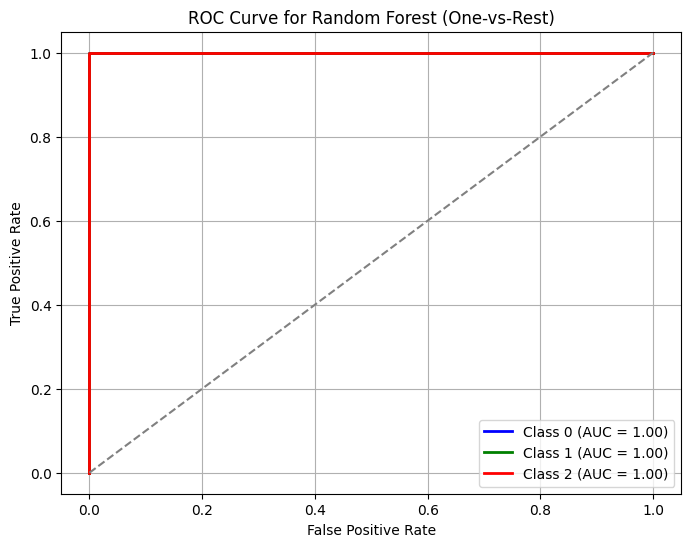

In [31]:

# Initialize the Random Forest model (no 'probability' argument needed)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Cross-validation (5-fold)
cv_scores = cross_val_score(rf, x_Scaled, y, cv=5)
print(f'Random Forest Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

# Generate predictions using cross-validation
y_pred = cross_val_predict(rf, x_Scaled, y, cv=5)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
print('Classification Report:')
print(classification_report(y, y_pred))

## AUC Calculation (One-vs-Rest)
rf.fit(x_Scaled, y)  # Fit once for predict_proba
probs = rf.predict_proba(x_Scaled)
roc_auc = roc_auc_score(y, probs, multi_class='ovr')
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc_per_class = {}

n_classes = len(set(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y == i, probs[:, i])
    roc_auc_per_class[i] = roc_auc_score(y == i, probs[:, i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc_per_class[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()